Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [1]:
import logging
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

from six.moves import range
from six.moves import cPickle as pickle
from functions import MultilayerPerceptron, LogisticRegression, model_training, reformat

tf.get_logger().setLevel(logging.ERROR)

In [2]:
with open('data/notMNIST.pickle', 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  
    
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

Test accuracy: 84.78%


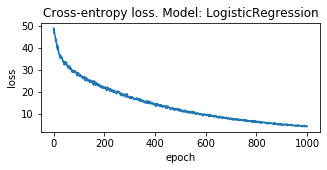

Test accuracy: 89.36%


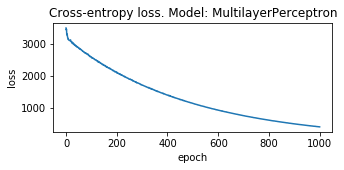

In [31]:
params = {'lr': 0.1, 'c': 0.01, 'num_steps': 1001, 'batch_size': 128}
for est_class in [LogisticRegression, MultilayerPerceptron]:
    model_training(train_dataset, test_dataset, train_labels, test_labels, est_class, params)

---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---

Test accuracy: 82.92%


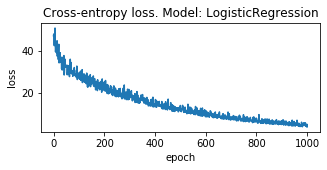

Test accuracy: 84.15%


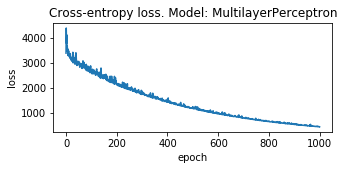

In [33]:
params.update({'batch_size': 10})
for est_class in [LogisticRegression, MultilayerPerceptron]:
    model_training(train_dataset, test_dataset, train_labels, test_labels, est_class, params)

Observation: Model training on data with fewer number of batches leads to the performance decrease.

---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---

Test accuracy: 85.39%


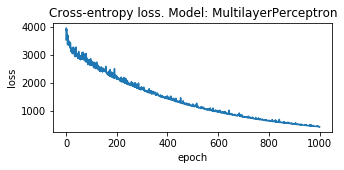

In [34]:
params['dropout_rate'] = 0.3
est_class=MultilayerPerceptron
model_training(train_dataset, test_dataset, train_labels, test_labels, est_class, params)

Observation: Model performance has been improved.

---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---
